# Lights model tutorial

In [1]:
%reset -f
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from tick.plot import plot_point_process
from lights.simulation import SimuJointLongitudinalSurvival
from lights.base.utils import heatmap, annotate_heatmap, gompertz_pdf, \
                              gompertz_survival, visualize_vect_learning
from sklearn.model_selection import ShuffleSplit
from lifelines.utils import concordance_index as c_index_score
from IPython.display import Markdown, display
from scipy.stats import beta
from matplotlib import rc
rc('text', usetex=True)

def printmd(string):
    display(Markdown(string))

## Generate data

In [2]:
n_long_features = 3
simu = SimuJointLongitudinalSurvival(seed=123, n_long_features=n_long_features, n_time_indep_features=5, n_samples=20)
X, Y, T, delta = simu.simulate()

printmd("\nLevel of censoring: **%.2f%%**" % (100*(1 - delta.mean())))

-----------------------------------------------------------
Launching simulation using SimuJointLongitudinalSurvival...
Done simulating using SimuJointLongitudinalSurvival in 1.68e-01 seconds.



Level of censoring: **45.00%**

## Add penalty

Launching the solver QNMCEM...
Launching the solver MLMM...
Launching the solver ULMM...
Done solving using ULMM in 1.52e+00 seconds
 n_iter  |   obj    | rel_obj 
       0 |  1433.14 |      inf
       1 |  1420.26 | 8.98e-03
       2 |  1418.15 | 1.49e-03
       3 |  1417.18 | 6.79e-04
       4 |  1416.52 | 4.65e-04
       5 |     1416 | 3.72e-04
       6 |  1415.55 | 3.15e-04
       7 |  1415.16 | 2.74e-04
       8 |  1414.82 | 2.41e-04
       9 |  1414.52 | 2.14e-04
      10 |  1414.25 | 1.91e-04
Done solving using MLMM in 2.71e+00 seconds
 n_iter  |   obj    | rel_obj 
       0 |  87.0249 |      inf
       1 |  74.9638 | 1.39e-01
       2 |  73.3571 | 2.14e-02
       3 |  73.0074 | 4.77e-03
       4 |  72.8405 | 2.29e-03
       5 |  72.7117 | 1.77e-03
       6 |  72.6489 | 8.64e-04
       7 |  72.6269 | 3.03e-04
       8 |  72.5782 | 6.70e-04
       9 |  72.5313 | 6.46e-04
      10 |  72.5145 | 2.33e-04
Done solving using QNMCEM in 7.79e+01 seconds


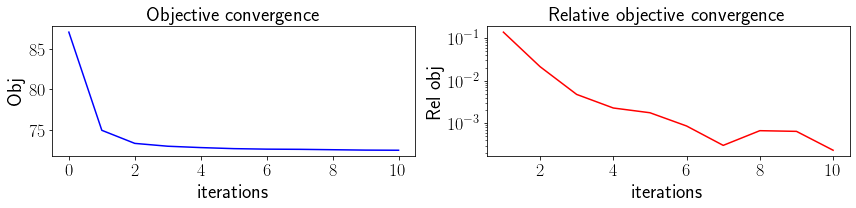

In [3]:
from lights.inference import QNMCEM

## Choose parameters ##
tol = 1e-6            # tolerance for the convergence stopping criterion 
eta = 0.3             # parameter controlling the trade-off between l1 
                      # and l2 regularization in the elasticNet
gamma_chosen = '1se'  # way to select l_elasticNet_chosen: '1se' or 'min'
warm_start = True     # at each L-BGFS-B iteration, reset beta to 0 or take 
                      # the previous value 
grid_size = 30        # grid size for the cross validation procedure
metric = 'C-index'    # cross-validation metric: 'log_lik' or 'C-index'

# declare learner here
fixed_effect_time_order = 1
qnmcem = QNMCEM(fixed_effect_time_order=fixed_effect_time_order, max_iter=10, initialize=True, print_every=1, 
                asso_functions=["lp", "re", "tps"], l_pen=0)
# qnmcem.fit(X_train, Y_train, T_train, delta_train)
qnmcem.fit(X, Y, T, delta)

# Visualize learning
visualize_vect_learning(qnmcem, "obj")

## Cross-validation ##

## Run selected model with l_elasticNet_chosen ##

# run final fit here

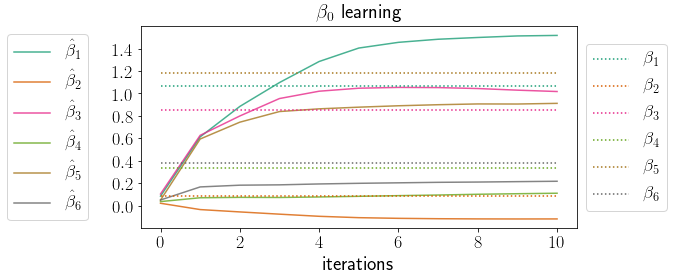

In [4]:
# Visualize beta_0
true_beta = simu.fixed_effect_coeffs[0].reshape(-1, 1)
to = len(true_beta)+1
leg1 = [r"$\hat \beta_%s$" % j for j in range(1, to)]
leg2 = [r"$\beta_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "beta_0", r"$\beta_0$", true_beta, leg1, leg2)

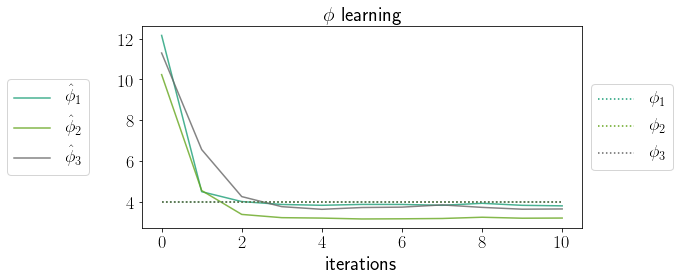

In [5]:
# Visualize phi
true_phi = np.array([simu.std_error ** 2] * simu.n_long_features).reshape(-1, 1)
to = len(true_phi)+1
leg1 = [r"$\hat \phi_%s$" % j for j in range(1, to)]
leg2 = [r"$\phi_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "phi", symbol = r"$\phi$", true_coeffs = true_phi, legend_est = leg1, legend_true = leg2)

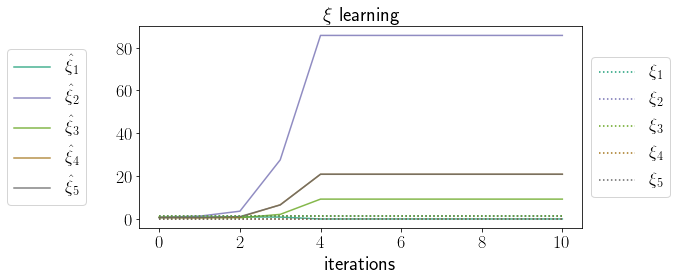

In [6]:
# Visualize xi
true_xi = simu.time_indep_coeffs.reshape(-1, 1)
to = len(true_xi)+1
leg1 = [r"$\hat \xi_%s$" % j for j in range(1, to)]
leg2 = [r"$\xi_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "xi", r"$\xi$", true_xi, leg1, leg2)

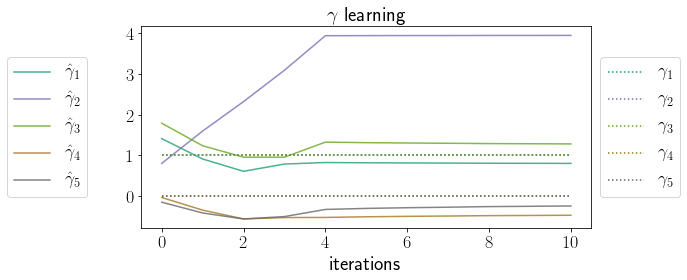

In [7]:
# Visualize gamma indepenent part
true_gamma_indep = simu.time_indep_coeffs.reshape(-1, 1)
to = len(true_gamma_indep)+1
leg1 = [r"$\hat \gamma_%s$" % j for j in range(1, to)]
leg2 = [r"$\gamma_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "gamma_0_indep", r"$\gamma$", true_gamma_indep, leg1, leg2)

## N = 100

In [8]:
n_long_features = 3
simu = SimuJointLongitudinalSurvival(seed=123, n_long_features=n_long_features, n_time_indep_features=5, n_samples=100)
X, Y, T, delta = simu.simulate()

printmd("\nLevel of censoring: **%.2f%%**" % (100*(1 - delta.mean())))

-----------------------------------------------------------
Launching simulation using SimuJointLongitudinalSurvival...
Done simulating using SimuJointLongitudinalSurvival in 4.25e-01 seconds.



Level of censoring: **40.00%**

Launching the solver QNMCEM...
Launching the solver MLMM...
Launching the solver ULMM...
Done solving using ULMM in 1.81e+00 seconds
 n_iter  |   obj    | rel_obj 
       0 |  7105.04 |      inf
       1 |  7050.19 | 7.72e-03
       2 |  7039.25 | 1.55e-03
       3 |  7033.88 | 7.64e-04
       4 |  7030.69 | 4.52e-04
       5 |  7028.58 | 3.01e-04
       6 |  7027.05 | 2.17e-04
       7 |  7025.88 | 1.66e-04
       8 |  7024.96 | 1.32e-04
       9 |   7024.2 | 1.08e-04
      10 |  7023.56 | 9.07e-05
Done solving using MLMM in 2.70e+00 seconds
 n_iter  |   obj    | rel_obj 
       0 |  84.1564 |      inf
       1 |  74.4007 | 1.16e-01
       2 |  73.4537 | 1.27e-02
       3 |  73.2124 | 3.28e-03
       4 |  73.1115 | 1.38e-03
       5 |  73.0512 | 8.25e-04
       6 |  72.9868 | 8.81e-04
       7 |  72.9433 | 5.95e-04
       8 |  72.9073 | 4.94e-04
       9 |  72.8956 | 1.61e-04
      10 |  72.8818 | 1.89e-04
Done solving using QNMCEM in 1.27e+03 seconds


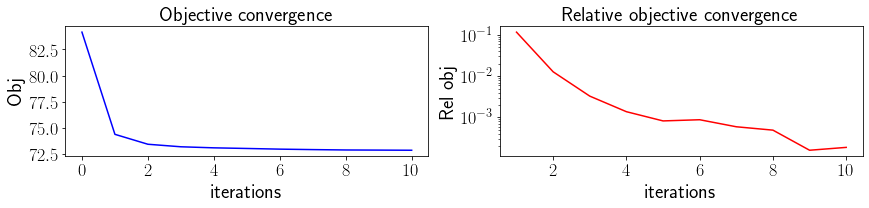

In [9]:
from lights.inference import QNMCEM

## Choose parameters ##
tol = 1e-6            # tolerance for the convergence stopping criterion 
eta = 0.3             # parameter controlling the trade-off between l1 
                      # and l2 regularization in the elasticNet
gamma_chosen = '1se'  # way to select l_elasticNet_chosen: '1se' or 'min'
warm_start = True     # at each L-BGFS-B iteration, reset beta to 0 or take 
                      # the previous value 
grid_size = 30        # grid size for the cross validation procedure
metric = 'C-index'    # cross-validation metric: 'log_lik' or 'C-index'

# declare learner here
fixed_effect_time_order = 1
qnmcem = QNMCEM(fixed_effect_time_order=fixed_effect_time_order, max_iter=10, initialize=True, print_every=1, 
                asso_functions=["lp", "re", "tps"], l_pen=0)
# qnmcem.fit(X_train, Y_train, T_train, delta_train)
qnmcem.fit(X, Y, T, delta)

# Visualize learning
visualize_vect_learning(qnmcem, "obj")

## Cross-validation ##

## Run selected model with l_elasticNet_chosen ##

# run final fit here

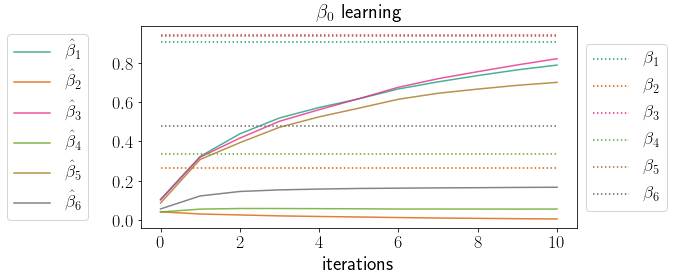

In [10]:
# Visualize beta_0
true_beta = simu.fixed_effect_coeffs[0].reshape(-1, 1)
to = len(true_beta)+1
leg1 = [r"$\hat \beta_%s$" % j for j in range(1, to)]
leg2 = [r"$\beta_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "beta_0", r"$\beta_0$", true_beta, leg1, leg2)

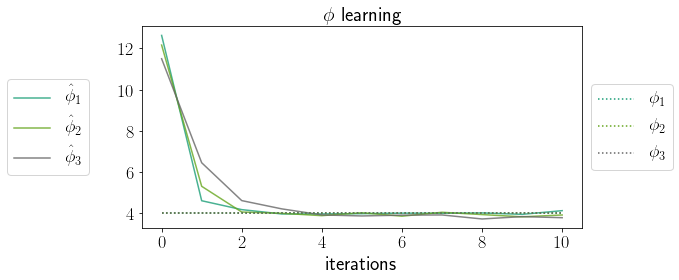

In [12]:
# Visualize phi
true_phi = np.array([simu.std_error ** 2] * simu.n_long_features).reshape(-1, 1)
to = len(true_phi)+1
leg1 = [r"$\hat \phi_%s$" % j for j in range(1, to)]
leg2 = [r"$\phi_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "phi", symbol = r"$\phi$", true_coeffs = true_phi, legend_est = leg1, legend_true = leg2)

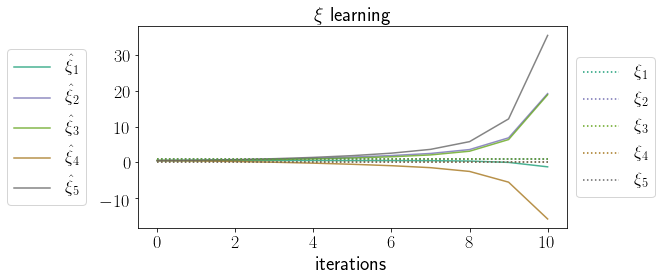

In [13]:
# Visualize xi
true_xi = simu.time_indep_coeffs.reshape(-1, 1)
to = len(true_xi)+1
leg1 = [r"$\hat \xi_%s$" % j for j in range(1, to)]
leg2 = [r"$\xi_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "xi", r"$\xi$", true_xi, leg1, leg2)

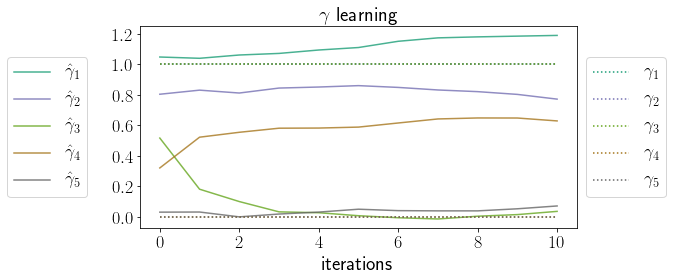

In [14]:
# Visualize gamma indepenent part
true_gamma_indep = simu.time_indep_coeffs.reshape(-1, 1)
to = len(true_gamma_indep)+1
leg1 = [r"$\hat \gamma_%s$" % j for j in range(1, to)]
leg2 = [r"$\gamma_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "gamma_0_indep", r"$\gamma$", true_gamma_indep, leg1, leg2)

### Visualize parameter vectors
We generate survival times with a risk model of the form
$$\begin{align*}
\lambda_i(t|G_i = k) &= \lambda_0(t) \exp \Big\{ x_i^\top \xi + \sum_{l=1}^L \gamma_{k,1}^l (\beta_{k,1}^l + \beta_{k,2}^l t + b_{i,1}^l + b_{i,2}^l t) + (\gamma_{k,2,1}^l b_{i,1}^l + \gamma_{k,2,2}^l b_{i,2}^l) + \gamma_{k,3}^l (\beta_{k,2}^l + b_{i,2}^l) \Big\} \\
&= \lambda_0(t) \exp \big\{ \iota_{i,k,1} + \iota_{i,k,2} t \big\}
\end{align*}$$

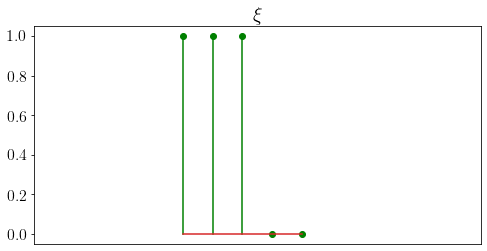

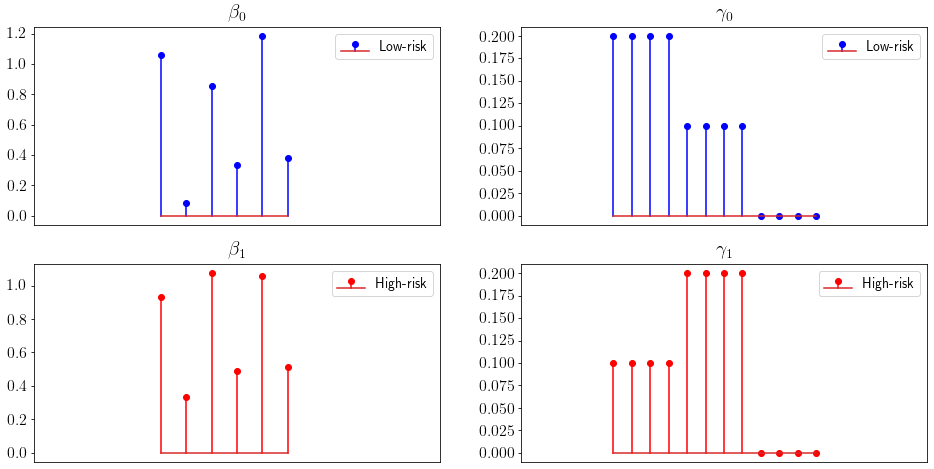

In [4]:

xi, betas, gammas = simu.time_indep_coeffs, simu.fixed_effect_coeffs, simu.asso_coeffs

fig = plt.figure(figsize=(8, 4))
fontsize = 16
ax = fig.add_subplot(111)
ax.stem(xi, linefmt='g-', markerfmt='go')
ax.set_xlim([-5, len(xi) + 5])
ax.set_title(r"$\xi$", fontsize=fontsize+4)
plt.yticks(fontsize=fontsize)
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()

fig = plt.figure(figsize=(16, 8))
names, colors, labels = ['beta', 'gamma'], ['b', 'r'], ['Low-risk', 'High-risk']
j = 1
for k in [0, 1]:
    for i, vectors in enumerate([betas, gammas]):
        name = names[i]
        ax = fig.add_subplot(2,2,j)
        j += 1
        ax.stem(vectors[k], linefmt='%s-' % colors[k], 
                markerfmt='%so' % colors[k], label=labels[k])
        ax.set_xlim([-5, len(vectors[k]) + 5])
        ax.set_title(r"$\%s_%s$" % (name, k), fontsize=fontsize+4)
        plt.yticks(fontsize=fontsize)
        plt.tick_params(axis='x', bottom=False, labelbottom=False)
        plt.legend(fontsize=fontsize-2)
plt.show()

### Visualize simulated times

We choose a Gompertz distribution for the baseline, that is
$$\lambda_0(t) = \kappa_1 \kappa_2 \exp(\kappa_2t)$$
with $\kappa_1 > 0$ and $\kappa_2 \in R$ the scale and shape parameters respectively.

kappa_1=0.001, kappa_2=0.1


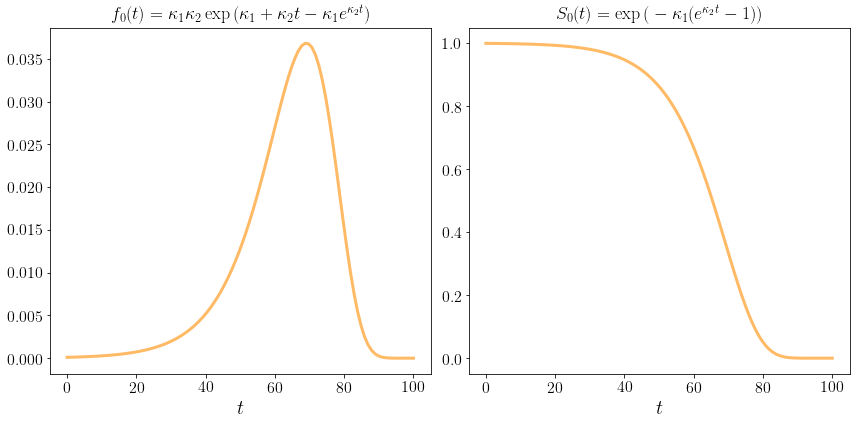

In [4]:
scale, shape = simu.scale, simu.shape
print("kappa_1=%s, kappa_2=%s" % (scale, shape))

fig = plt.figure(figsize=(12, 6))
# Density function plot
ax = fig.add_subplot(121)
t = np.linspace(0, 100, 100)
ax.plot(t, gompertz_pdf(t, shape, scale), '-', color='darkorange', lw=3, alpha=0.6)
plt.xlabel(r"$t$", fontsize=fontsize+4)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title(r"$f_0(t) = \kappa_1 \kappa_2 \exp \big(\kappa_1 + \kappa_2 t -\kappa_1 e^{\kappa_2 t}\big)$", 
          size=fontsize+2)

# Survival function plot
ax = fig.add_subplot(122)
t = np.linspace(0, 100, 100)
ax.plot(t, gompertz_survival(t, shape, scale), '-', color='darkorange', lw=3, alpha=0.6)
plt.xlabel(r"$t$", fontsize=fontsize+4)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title(r"$S_0(t) = \exp \big(-\kappa_1 (e^{\kappa_2 t} - 1) \big)$", size=fontsize+2)

fig.tight_layout()
plt.show()

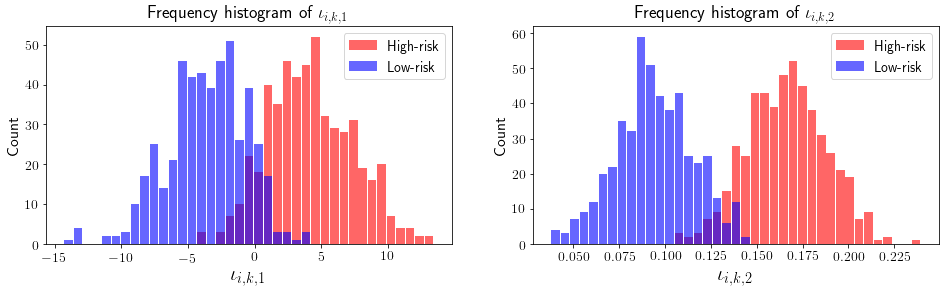

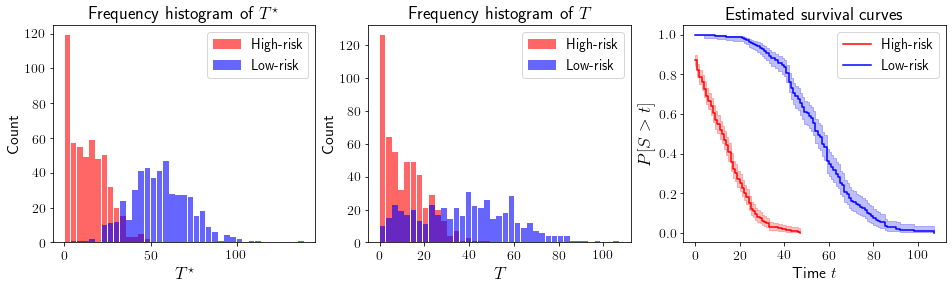

In [5]:
fig = plt.figure(figsize=(16, 4))
iotas = simu.iotas
for i in [1, 2]:
    ax = fig.add_subplot(1,2,i)
    iota_0i, iota_1i = iotas[i]
    all_iota = list(iota_0i) + list(iota_1i)
    mini, maxi = min(all_iota), max(all_iota)
    bins = np.linspace(mini, maxi, 40)
    kwargs = dict(bins=bins, alpha=0.6, rwidth=0.9)
    plt.hist(iota_1i, **kwargs, color='r', label='High-risk')
    plt.hist(iota_0i, **kwargs, color='b', label='Low-risk')
    plt.xlabel(r"$\iota_{i,k,%s}$" % i, size=fontsize + 5)
    plt.ylabel("Count", size=fontsize)
    plt.legend(fontsize=fontsize-2)
    ax.tick_params(labelsize=fontsize-2)
    plt.title("Frequency histogram of " + r'$\iota_{i,k,%s}$' % i, size=fontsize+2)
plt.show()

fig = plt.figure(figsize=(16, 4))
G = simu.latent_class
T_star = simu.event_times
times, labels = [T_star, T], ['T^\star', 'T']
for i in [0, 1]:
    ax = fig.add_subplot(1,3,i+1)
    df = pd.DataFrame(data={"time": times[i], "group": G})
    bins = np.linspace(0, times[i].max(), 40)
    kwargs = dict(bins=bins, alpha=0.6, rwidth=0.9)
    plt.hist(df.loc[df.group == 1, 'time'], **kwargs, color='r', label='High-risk')
    plt.hist(df.loc[df.group==0, 'time'], **kwargs, color='b', label='Low-risk')
    plt.legend(fontsize=fontsize-2)
    plt.xlabel(r'$%s$' % labels[i], size=fontsize+2)
    plt.ylabel("Count", size=fontsize)
    ax.tick_params(labelsize=fontsize-2)
    plt.title("Frequency histogram of " + r'$%s$' % labels[i], size=fontsize+2)

# Kaplan Meier estimation of survival curves
kmf = KaplanMeierFitter()
ax = plt.subplot(133)
kmf.fit(T[G == 1], delta[G == 1], label="High-risk").plot(ax=ax, c='r')
kmf.fit(T[G == 0], delta[G == 0], label="Low-risk").plot(ax=ax, c='b')
plt.legend(fontsize=fontsize-2)
plt.xlabel('Time $t$', size=fontsize)
plt.ylabel(r'$P[S > t]$', size=fontsize+2)
plt.title("Estimated survival curves", size=fontsize+2)
ax.tick_params(labelsize=fontsize-2)
plt.show()

### Visualize longitudinal processes for two subjects randomly chosen

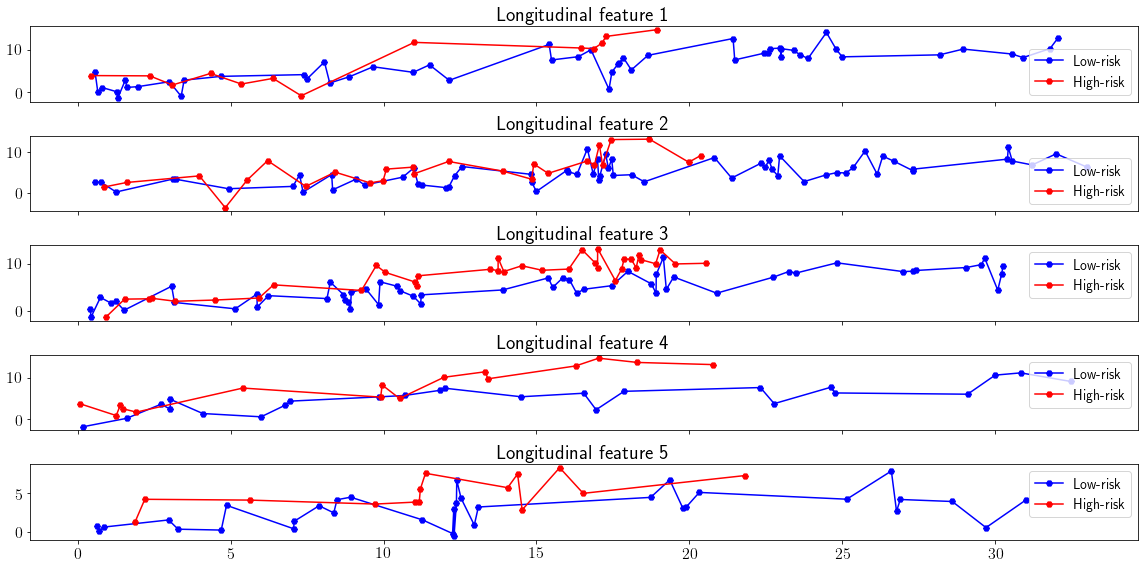

In [6]:
np.random.seed(10)
fig = plt.figure(figsize=(16, 8))
ax0 = plt.subplot(n_long_features,1,1)
colors, labels = ['b', 'r'], ['Low-risk', 'High-risk']
for k in [0, 1]:
    idx = np.random.choice(Y[G == k].index)
    Y_i = Y.loc[idx, :]
    label, color = labels[k], colors[k]
    for l in range(1, n_long_features + 1):
        Y_il = Y_i["long_feature_%s" % l]
        ax = plt.subplot(n_long_features,1 ,l , sharex=ax0)
        Y_il.plot(label=label, color=color, marker='H')
        ax.set_title("Longitudinal feature %s" % l, fontsize=fontsize+4)
        plt.xticks(fontsize=fontsize), plt.yticks(fontsize=fontsize)
        plt.legend(fontsize=fontsize-2)
fig.tight_layout()
plt.show()

### Visualize Hawkes Processes used to generate time measurements of longitudinal data for the previous high-risk subject

For a subject $i$, times $\{t_{ij}^l\}_{j \geq 1}$ for processes $l=1, \ldots, L$ are simulated using a multivariate Hawkes process $N_{it} = [N_{it}^1 \cdots N_{it}^L]$ with $t \geq 0$ and $N_{it}^l = \sum_{j \geq 1} 1_{\{t_{ij}^l \leq t\}}$. The process $N_{it}$ is a multivariate counting process, whose components $N_{it}^l$ have intensities
$$\lambda_i^l(t) = \Upsilon_{l} + \sum_{l'=1}^L \sum_{j \geq 1} A_{ll'} \upsilon \exp\big(-\upsilon(t - t_{ij}^{l'}) \big)$$
for $l=1, \ldots, L$.

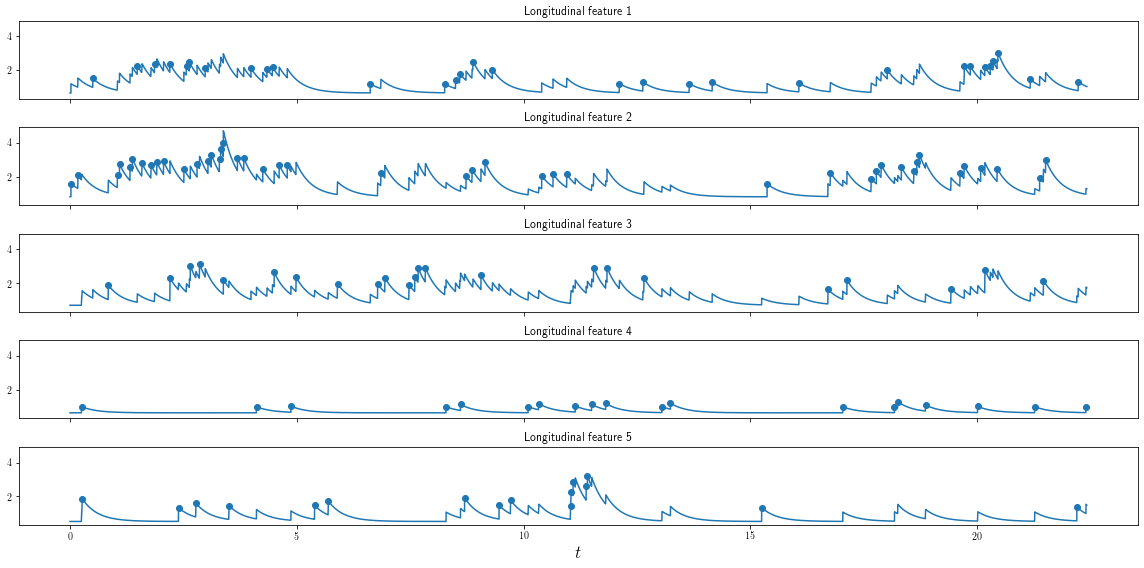

In [7]:
hawkes = simu.hawkes
hawkes_i = hawkes[idx]
adjacency = hawkes_i.adjacency

# need to reset hawkes to track intensity
hawkes_i.reset()
dt = 0.01
hawkes_i.track_intensity(dt)
hawkes_i.simulate()

fig, ax = plt.subplots(n_long_features, 1, figsize=(16, 8), sharex=True, sharey=True)
long_features_names = ["Longitudinal feature %s" % (l + 1) for l in range(n_long_features)]
plot_point_process(hawkes_i, n_points=50000, ax=ax, node_names=long_features_names)
fig.tight_layout()

The matrix $A = [A_{ll'}]_{1 \leq l,l' \leq L}$ is the adjacency matrix such that $A_{ll'} \geq 0$ quantifies the impact of past measurement time of process $l'$ on the measurement time of process $l$, and $\upsilon \geq 0$ is a memory parameter.

We also plot the density of the law used to simulate $t_i^{max}$, that is
$$t_i^{max} \sim T_i \times \big(1 - \text{Beta}(\nu_1, \nu_2)\big)$$
with $(\nu_1, \nu_2) = (2,5)$, to mimic the fact that in practice, one has access to a reasonable amount of longitudinal data before making a prediction.

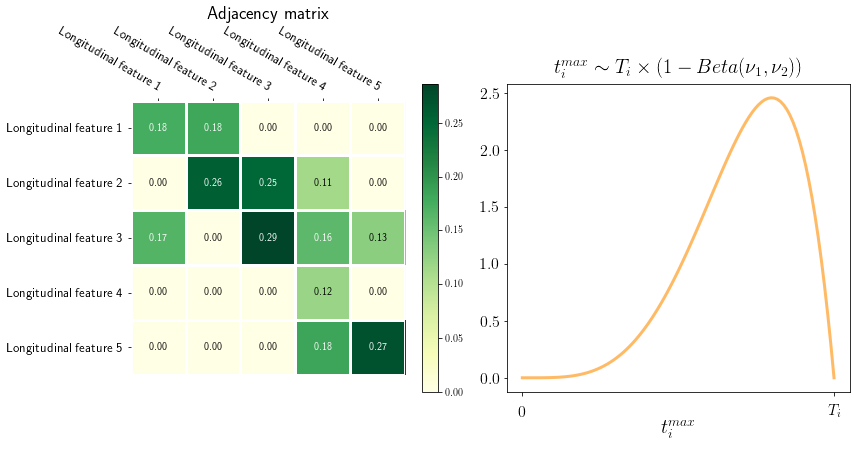

In [8]:
fig = plt.figure(figsize=(12, 6))
# Adjacency matrix
ax = fig.add_subplot(121)
im, cbar = heatmap(adjacency, long_features_names, long_features_names, ax=ax, cmap="YlGn")
texts = annotate_heatmap(im)
plt.title("Adjacency matrix", size=fontsize+2)

# Density of the law for the time up to which one has longitudinal data
ax = fig.add_subplot(122)
a, b = 2, 5
x = np.linspace(beta.ppf(0.0, a, b),
                beta.ppf(1, a, b), 100)
ax.plot(x, beta.pdf(1-x, a, b), '-', color='darkorange', lw=3, alpha=0.6)
labels = ['', r'$0$', r"$T_i$"]
plt.xlabel(r"$t_i^{max}$", fontsize=fontsize+4)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax.tick_params(axis='x', pad=10)
plt.title(r"$t_i^{max} \sim T_i \times \big(1 - Beta(\nu_1, \nu_2)\big) $", size=fontsize+4)
plt.locator_params(axis='x', nbins=2)
ax.set_xticklabels(labels)

fig.tight_layout()
plt.show()

# Lights learning

## Initializer illustration

Since our QNMCEM algorithm gives a local minimum, it is clever to choose an initial value $\theta^{(0)}$ close to the final solution $\hat \theta$, so that the number of iterations required to reach convergence is reduced.

The longitudinal submodels parameters $\beta_k^{(0)}$, $D^{(0)}$ and $\phi^{(0)}$ are initialized (like if there is no subgroup ($\beta_0^{(0)} = \beta_{1}^{(0)}$)) using a multivariate linear mixed model (MLMM) with an explicit EM algorithm, being itself initialized with univariates fits (ULMM). Let us test those initializer on a simple example.

### Simulation with no latent subgroups

In [9]:
from lights.init.mlmm import MLMM
from lights.base.base import extract_features
from lights.base.utils import plot_history

# high_risk_rate=0 for no subgroups
simu_ = SimuJointLongitudinalSurvival(n_samples=200, n_time_indep_features=5,
                                     n_long_features=3, seed=1, high_risk_rate=0)
Y_ = simu_.simulate()[1]
# Get true beta parameter
true_beta_ = simu_.fixed_effect_coeffs[0]

-----------------------------------------------------------
Launching simulation using SimuJointLongitudinalSurvival...
Done simulating using SimuJointLongitudinalSurvival in 7.63e-01 seconds.


### MLMM with fixed initialization

For instance $\beta^{(0)}=\textbf{0}$

Launching the solver MLMM...
 n_iter  |   obj    | rel_obj 
       0 |  19025.7 |      inf
      10 |  14129.6 | 4.63e-04
      20 |  14100.9 | 1.26e-04
      30 |  14086.8 | 8.62e-05
      40 |    14076 | 7.07e-05
      50 |  14066.8 | 6.19e-05
      60 |  14058.5 | 5.66e-05
      70 |  14050.8 | 5.35e-05
      80 |  14043.5 | 5.19e-05
      90 |  14036.2 | 5.13e-05
     100 |    14029 | 5.16e-05
     110 |  14021.7 | 5.25e-05
     120 |  14014.2 | 5.40e-05
     130 |  14006.5 | 5.59e-05
     140 |  13998.5 | 5.83e-05
     150 |  13990.2 | 6.11e-05
     160 |  13981.4 | 6.43e-05
     170 |  13972.1 | 6.78e-05
     180 |  13962.3 | 7.16e-05
     190 |  13952.1 | 7.54e-05
     200 |  13941.3 | 7.89e-05
     210 |  13930.1 | 8.15e-05
     220 |  13918.6 | 8.27e-05
     230 |  13907.1 | 8.16e-05
     240 |  13896.1 | 7.78e-05
     250 |  13885.7 | 7.14e-05
     260 |  13876.4 | 6.30e-05
     270 |  13868.4 | 5.32e-05
     280 |  13861.8 | 4.30e-05
     290 |  13856.6 | 3.31e-05
     300 |

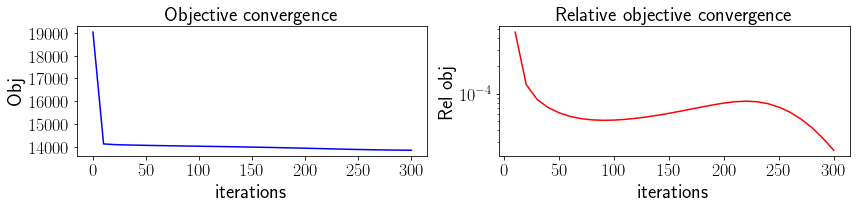

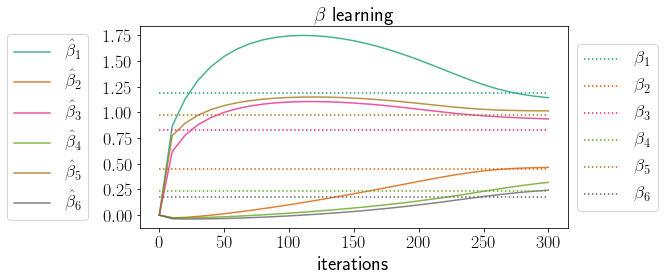

In [10]:
fixed_effect_time_order = 1
tol = 1e-5
mlmm = MLMM(fixed_effect_time_order=fixed_effect_time_order, 
            tol=tol, initialize=False, max_iter=300)
# Get design features matrices
extracted_features = extract_features(Y_, fixed_effect_time_order)
# Train the initializer
mlmm.fit(extracted_features)

# Visualize learning
to = len(true_beta_)+1
leg1 = [r"$\hat \beta_%s$" % j for j in range(1, to)]
leg2 = [r"$\beta_%s$" % j for j in range(1, to)]
visualize_vect_learning(mlmm, "fixed_effect_coeffs", r"$\beta$", true_beta_, leg1, leg2)

### MLMM with ULMM initialization

<span style="color:crimson">**Convergence is faster, and the estimation much better**</span>

Launching the solver MLMM...
Launching the solver ULMM...
Done solving using ULMM in 7.72e+00 seconds
 n_iter  |   obj    | rel_obj 
       0 |  13945.4 |      inf
       5 |    13877 | 2.40e-04
      10 |  13867.3 | 9.92e-05
      15 |  13862.5 | 5.62e-05
      20 |  13859.4 | 3.78e-05
      25 |  13857.2 | 2.86e-05
      30 |  13855.5 | 2.31e-05
      35 |    13854 | 1.93e-05
      40 |  13852.8 | 1.65e-05
      45 |  13851.8 | 1.41e-05
      50 |  13850.9 | 1.22e-05
      55 |  13850.1 | 1.05e-05
Done solving using MLMM in 2.93e+01 seconds


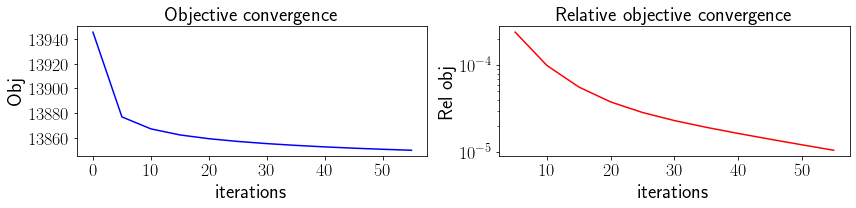

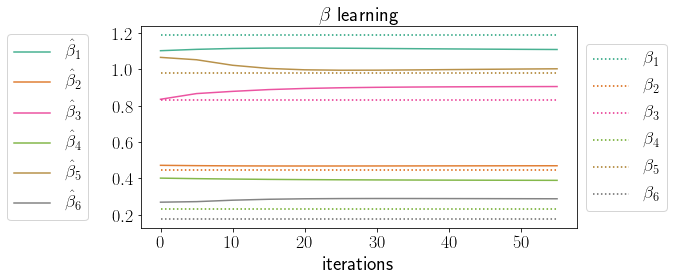

In [11]:
mlmm = MLMM(fixed_effect_time_order=fixed_effect_time_order, 
            print_every=5, tol=tol, initialize=True)
extracted_features = extract_features(Y_, fixed_effect_time_order)
mlmm.fit(extracted_features)
visualize_vect_learning(mlmm, "fixed_effect_coeffs", r"$\beta$", true_beta_, leg1, leg2)

## Data splitting

In [3]:
# Split data into training and test sets 
test_size = .3  # proportion of data used for testing
rs = ShuffleSplit(n_splits=1, test_size=test_size, random_state=0)

for train_index, test_index in rs.split(X):
    X_test = X[test_index]
    Y_test = Y.iloc[test_index, :]
    T_test = T[test_index]
    delta_test = delta[test_index]

    X_train = X[train_index]
    Y_train = Y.iloc[train_index, :]
    T_train = T[train_index]
    delta_train = delta[train_index]  
    
print("%d%% for training, %d%% for testing." 
      % ((1 - test_size) * 100, test_size * 100))

70% for training, 30% for testing.


## Training 

Launching the solver QNMCEM...
Launching the solver MLMM...
Launching the solver ULMM...
Done solving using ULMM in 4.02e-01 seconds
 n_iter  |   obj    | rel_obj 
       0 |  1433.14 |      inf
       1 |  1420.26 | 8.98e-03
       2 |  1418.15 | 1.49e-03
       3 |  1417.18 | 6.79e-04
       4 |  1416.52 | 4.65e-04
       5 |     1416 | 3.72e-04
       6 |  1415.55 | 3.15e-04
       7 |  1415.16 | 2.74e-04
       8 |  1414.82 | 2.41e-04
       9 |  1414.52 | 2.14e-04
      10 |  1414.25 | 1.91e-04
      11 |  1414.01 | 1.72e-04
      12 |  1413.79 | 1.55e-04
      13 |  1413.59 | 1.40e-04
      14 |  1413.41 | 1.27e-04
      15 |  1413.25 | 1.16e-04
Done solving using MLMM in 5.81e-01 seconds
 n_iter  |   obj    | rel_obj 
       0 |  90.3994 |      inf
       1 |  75.9046 | 1.60e-01
       2 |  73.6366 | 2.99e-02
       3 |  73.2269 | 5.56e-03
       4 |  73.5731 | 4.73e-03
       5 |  72.8124 | 1.03e-02
       6 |  72.5059 | 4.21e-03
       7 |  72.4471 | 8.11e-04
       8 |   73.1

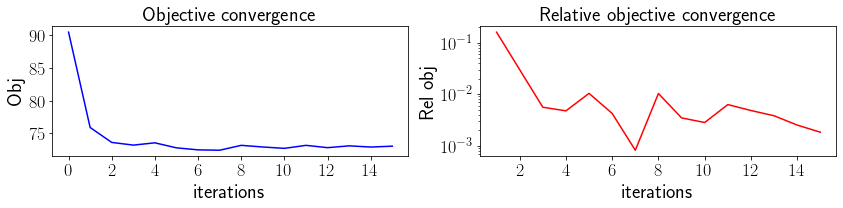

In [3]:
from lights.inference import QNMCEM

## Choose parameters ##
tol = 1e-6            # tolerance for the convergence stopping criterion 
eta = 0.3             # parameter controlling the trade-off between l1 
                      # and l2 regularization in the elasticNet
gamma_chosen = '1se'  # way to select l_elasticNet_chosen: '1se' or 'min'
warm_start = True     # at each L-BGFS-B iteration, reset beta to 0 or take 
                      # the previous value 
grid_size = 30        # grid size for the cross validation procedure
metric = 'C-index'    # cross-validation metric: 'log_lik' or 'C-index'

# declare learner here
fixed_effect_time_order = 1
qnmcem = QNMCEM(fixed_effect_time_order=fixed_effect_time_order, max_iter=15, initialize=True, print_every=1)
# qnmcem.fit(X_train, Y_train, T_train, delta_train)
qnmcem.fit(X, Y, T, delta)

# Visualize learning
visualize_vect_learning(qnmcem, "obj")

## Cross-validation ##

## Run selected model with l_elasticNet_chosen ##

# run final fit here

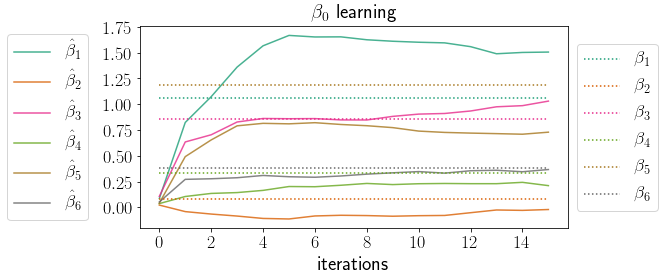

In [5]:
# Visualize beta_0
true_beta = simu.fixed_effect_coeffs[0].reshape(-1, 1)
to = len(true_beta)+1
leg1 = [r"$\hat \beta_%s$" % j for j in range(1, to)]
leg2 = [r"$\beta_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "beta_0", r"$\beta_0$", true_beta, leg1, leg2)

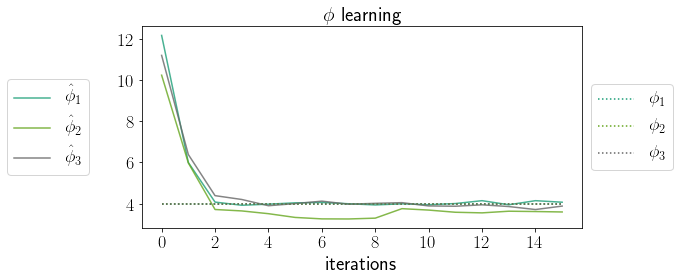

In [6]:
# Visualize phi
true_phi = np.array([simu.std_error ** 2] * simu.n_long_features).reshape(-1, 1)
to = len(true_phi)+1
leg1 = [r"$\hat \phi_%s$" % j for j in range(1, to)]
leg2 = [r"$\phi_%s$" % j for j in range(1, to)]
visualize_vect_learning(qnmcem, "phi", symbol = r"$\phi$", true_coeffs = true_phi, legend_est = leg1, legend_true = leg2)

### Note
* Currently, for debugging phase, just run first two cells and move to "Training" cell to run QNMCEM algorithm
* Call the QNMCEM function to run experiments with different setting (l_pen, max_iter, copt_accelerate, ...)

## Prediction

In [ ]:
## Obtain the marker vector on test set ##

# prediction here

#c_index = c_index_score(Y_test, marker, delta_test)
#c_index = max(c_index, 1 - c_index)

print("Done predicting on test set.")
#print("C-index : %.2f" % c_index)

## Figures

### Learning curves

### Convergence

### Beta coefficients